In [16]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import os
import numpy as np

In [17]:
df = pd.read_csv("results_alitzel_data_experiment1.csv")

In [18]:
N = len(os.listdir("./networks/"))

In [19]:
data = np.zeros((N,N))

In [20]:
keys = [s.split('.')[0] for s in os.listdir("./networks/")]
keys = sorted(["_".join([s.split('_')[1],s.split('_')[0]]) for s in keys])

In [21]:
print(keys)

['fitch_K00019', 'fitch_K00020', 'fitch_K00048', 'fitch_K00121', 'fitch_K00135', 'fitch_K00140', 'fitch_K00161', 'fitch_K00162', 'fitch_K00163', 'fitch_K00164', 'fitch_K00208', 'fitch_K00228', 'fitch_K00241', 'fitch_K00242', 'fitch_K00252', 'fitch_K00254', 'fitch_K00262', 'fitch_K00275', 'fitch_K00332', 'fitch_K00333', 'fitch_K00362', 'fitch_K00363', 'fitch_K00381', 'fitch_K00390', 'fitch_K00457', 'fitch_K00459', 'fitch_K00568', 'fitch_K00573', 'fitch_K00610', 'fitch_K00627', 'fitch_K00632', 'fitch_K00641', 'fitch_K00651', 'fitch_K00656', 'fitch_K00658', 'fitch_K00681', 'fitch_K00684', 'fitch_K00705', 'fitch_K00799', 'fitch_K00850', 'fitch_K00940', 'fitch_K00943', 'fitch_K00963', 'fitch_K00970', 'fitch_K00982']


In [22]:
results_dict = {}

In [23]:
for row in df.itertuples(): 
    fname1 = row.fname1.split('.')[0]
    fname1 = "_".join([fname1.split('_')[1],fname1.split('_')[0]])

    fname2 = row.fname2.split('.')[0]
    fname2 = "_".join([fname2.split('_')[1],fname2.split('_')[0]])

    results_dict[(fname1,fname2)] = int(row.distance)

In [30]:
print(df.head)

<bound method NDFrame.head of         Unnamed: 0             fname1             fname2  distance   runtime
0                0  K00362_sankoff.gr  K00362_sankoff.gr         0  0.000350
1                1  K00362_sankoff.gr  K00140_sankoff.gr         7  0.000384
2                2  K00362_sankoff.gr  K00982_sankoff.gr         4  0.000271
3                3  K00362_sankoff.gr  K00262_sankoff.gr         6  0.000277
4                4  K00362_sankoff.gr  K06929_genesis.gr         6  0.000266
...            ...                ...                ...       ...       ...
279836      279836  K00943_genesis.gr  K08300_sankoff.gr         1  0.000240
279837      279837  K00943_genesis.gr    K03316_fitch.gr         1  0.000236
279838      279838  K00943_genesis.gr  K06916_sankoff.gr         3  0.000244
279839      279839  K00943_genesis.gr  K02427_sankoff.gr         2  0.000230
279840      279840  K00943_genesis.gr  K00943_genesis.gr         0  0.000192

[279841 rows x 5 columns]>


In [24]:
for k1, fname1 in enumerate(keys):
    for k2, fname2 in enumerate(keys):
        data[k1,k2] = results_dict[(fname1,fname2)]

45


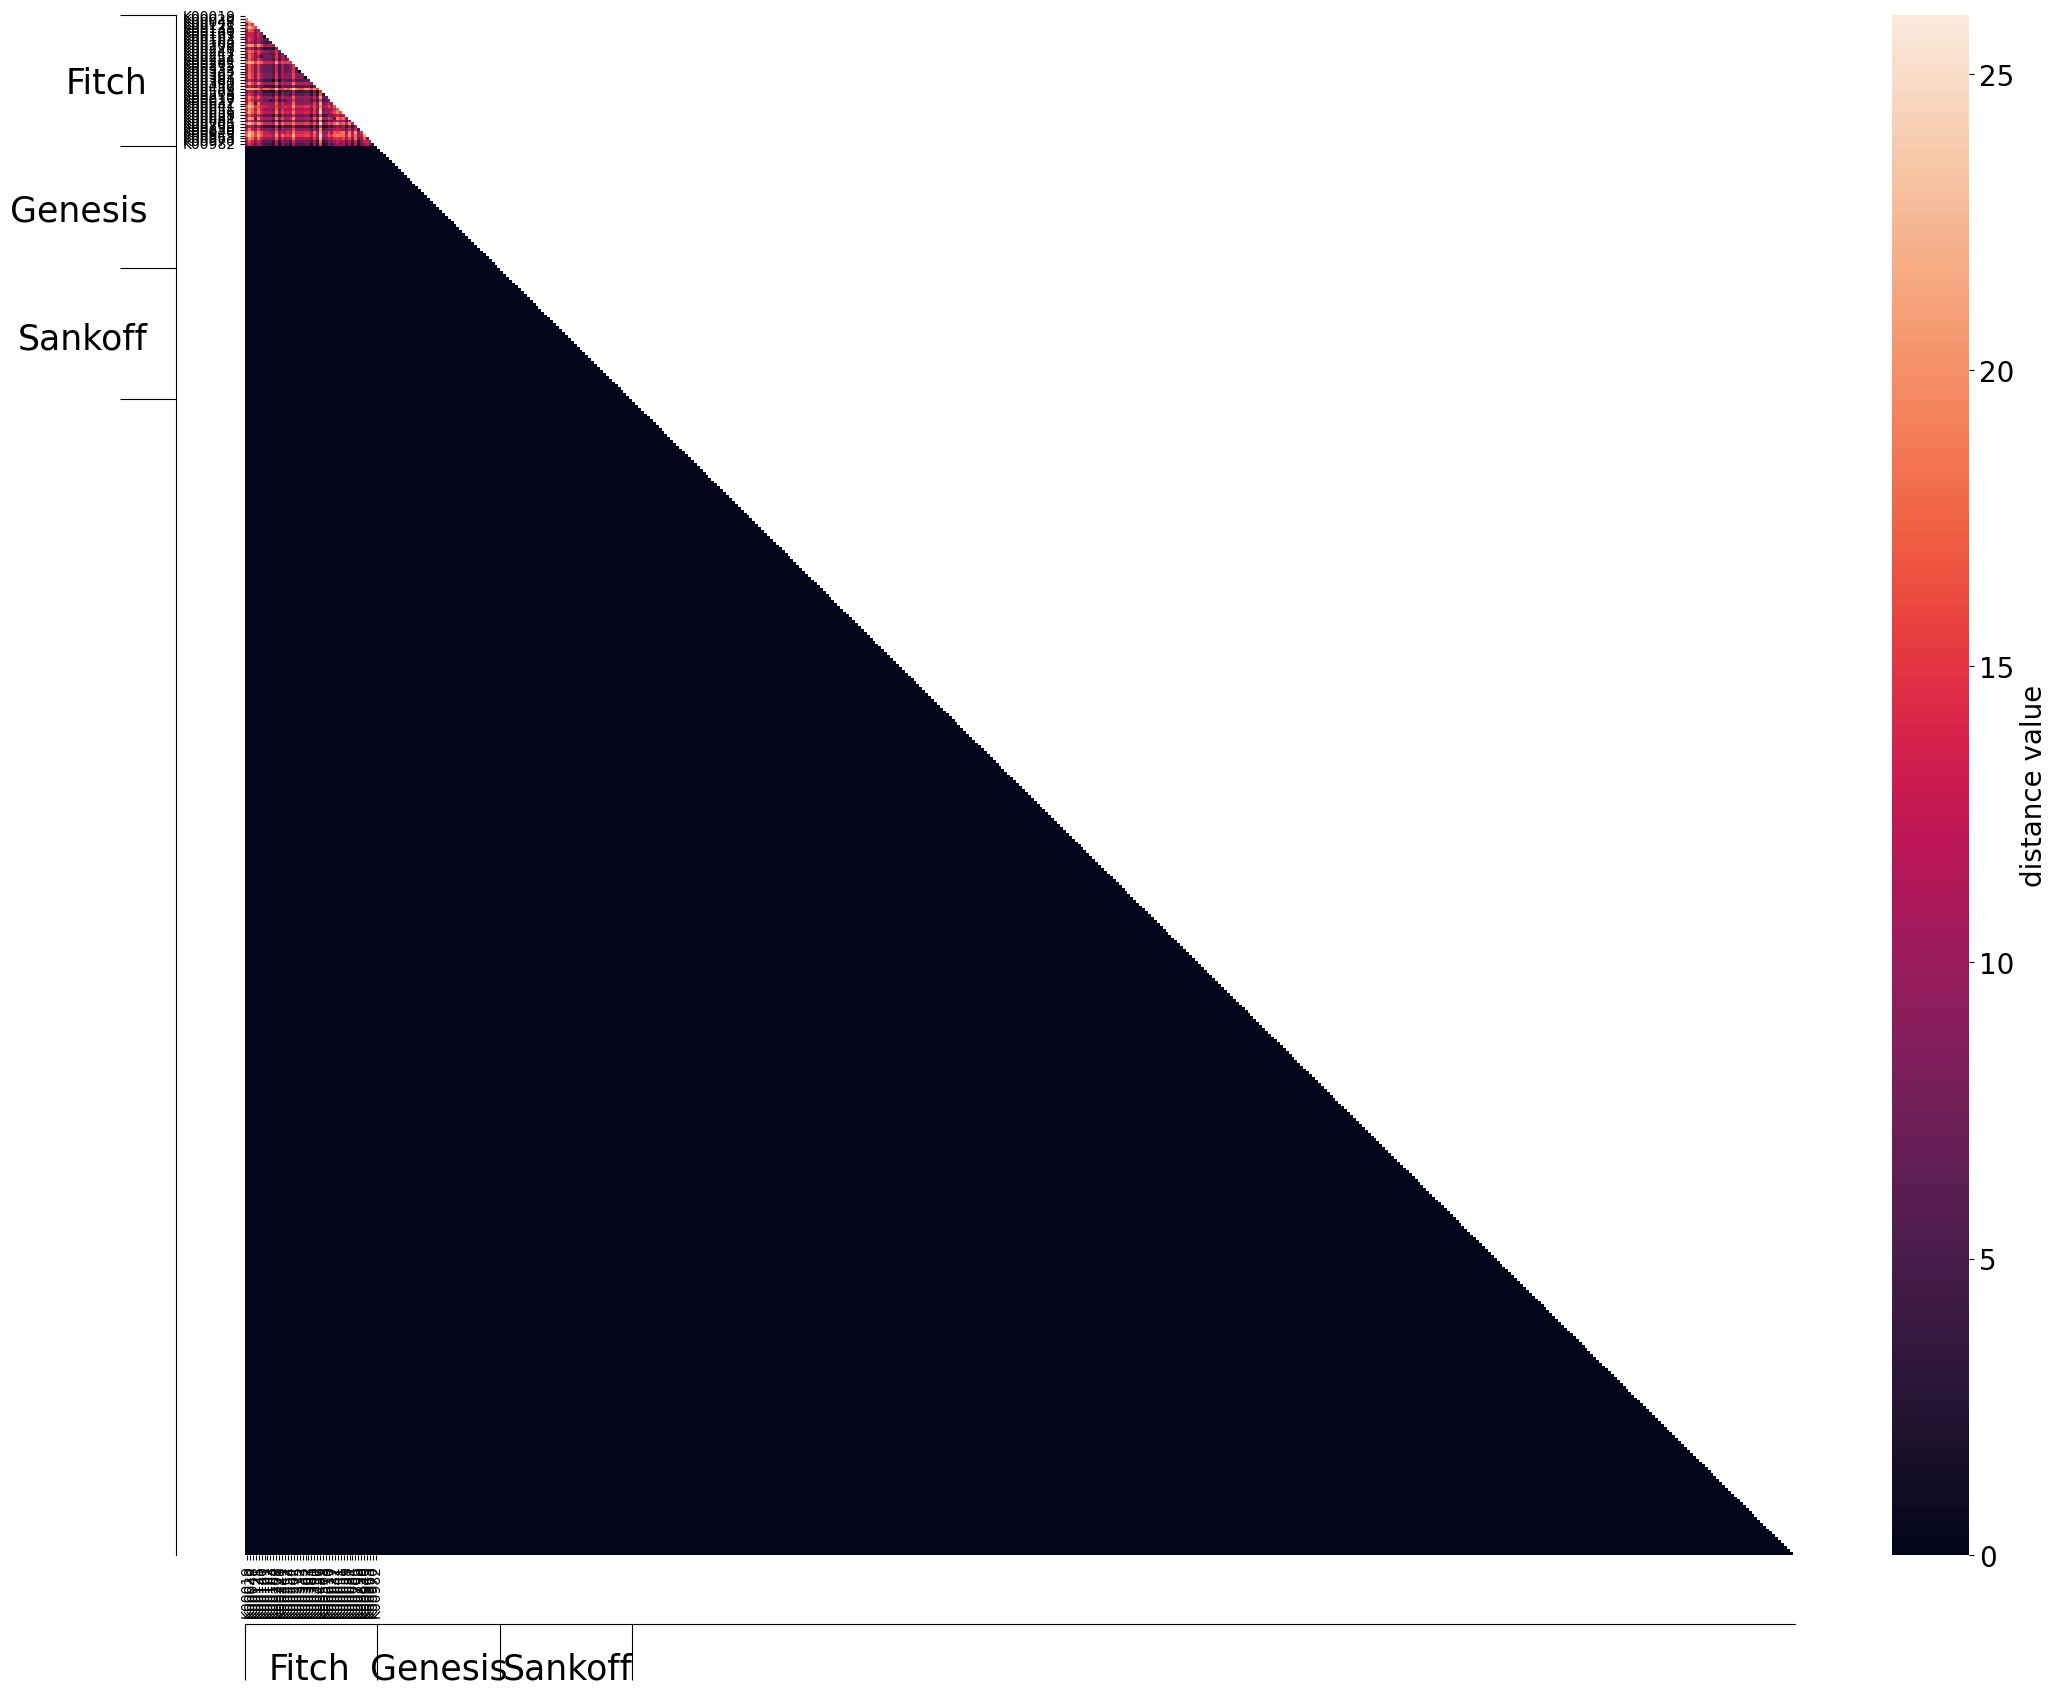

In [25]:
print(len(keys))
new_keys = [key.split("_")[1] for key in keys]
fig, ax = plt.subplots(figsize=(25,20))
mask = np.triu(np.ones_like(data, dtype=bool))
ax = sns.heatmap(data,xticklabels=new_keys,yticklabels=new_keys,cbar_kws={"label":"distance value"},mask=mask)
# Get the colorbar axes
cbar_axes = ax.figure.axes[-1]

sec = ax.secondary_yaxis(location=-.06)
sec.spines['left'].set_visible(False)
sec.set_yticks([22,66,110],labels=['Fitch','Genesis','Sankoff'],fontsize=25)
sec.tick_params('y',length=0)

sec2 = ax.secondary_yaxis(location=-.045)
sec2.set_yticks([0,45,87,132],labels=[])
sec2.tick_params('y',length=40)

sec3 = ax.secondary_xaxis(location=-.06)
sec3.spines['bottom'].set_visible(False)
sec3.set_xticks([22,66,110],labels=['Fitch','Genesis','Sankoff'],fontsize=25)
sec3.tick_params('x',length=0)

sec4 = ax.secondary_xaxis(location=-.045)
sec4.set_xticks([0,45,87,132],labels=[])
sec4.tick_params('x',length=40)

# Set the font size for colorbar tick labels
cbar_axes.tick_params(labelsize=20)

# Set the font size for the colorbar label
cbar_axes.yaxis.label.set_size(20)
fig.savefig("figure_character_reconstruction.pdf")

In [26]:
keys = sorted(keys, key=lambda x : x.split("_")[1])
for k1, fname1 in enumerate(keys):
    for k2, fname2 in enumerate(keys):
        data[k1,k2] = results_dict[(fname1,fname2)]

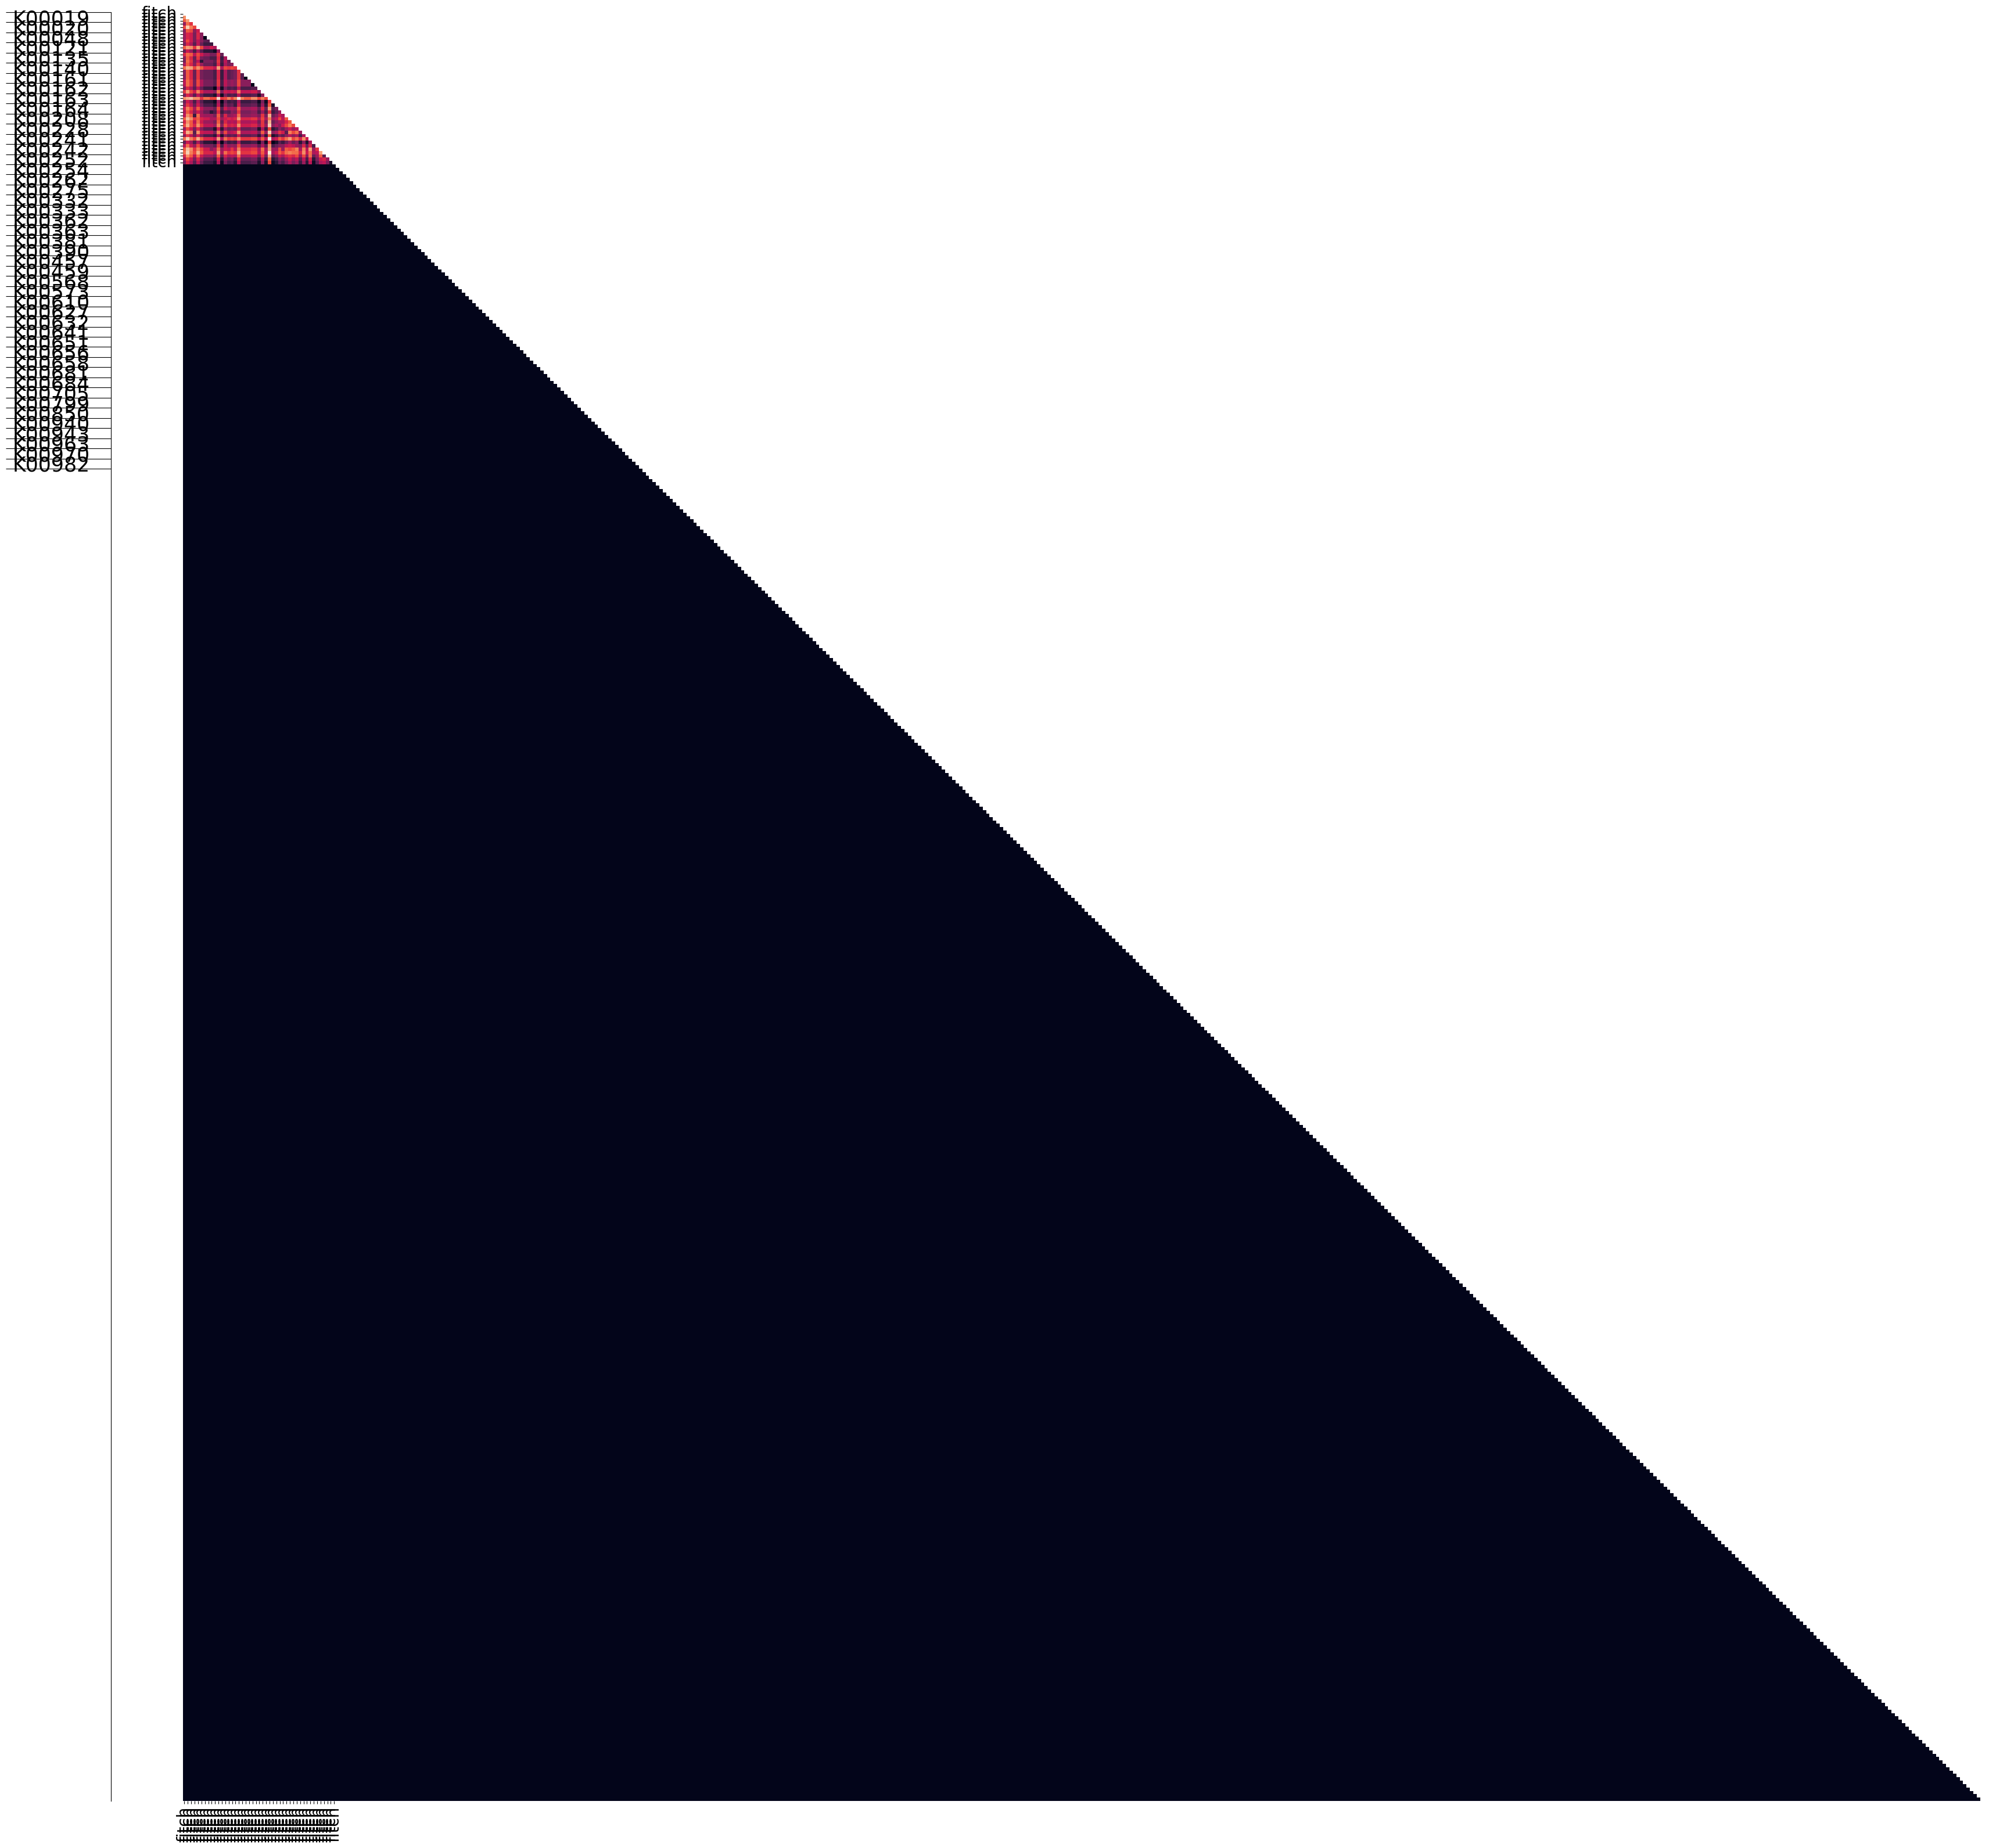

In [27]:
new_keys = [key.split("_")[0] for key in keys]
fig, ax = plt.subplots(figsize=(40,40))
mask = np.triu(np.ones_like(data, dtype=bool))
ax = sns.heatmap(data,xticklabels=new_keys,yticklabels=new_keys,cbar_kws={"label":"distance value"},mask=mask,cbar=False)
# Get the colorbar axes
cbar_axes = ax.figure.axes[-1]

sec = ax.secondary_yaxis(location=-.05)
sec.spines['left'].set_visible(False)
sec.set_yticks([3*i+1.5 for i in range(45)],labels=sorted(list(set([key.split("_")[1] for key in keys]))),fontsize=25)
sec.tick_params('y',length=0)

sec2 = ax.secondary_yaxis(location=-.04)
sec2.set_yticks([3*i for i in range(46)],labels=[])
sec2.tick_params('y',length=130)

#sec3 = ax.secondary_xaxis(location=-.06)
#sec3.spines['bottom'].set_visible(False)
#sec3.set_xticks([22,66,110],labels=['Fitch','Genesis','Sankoff'],fontsize=25)
#sec3.tick_params('x',length=0)

#sec4 = ax.secondary_xaxis(location=-.045)
#sec4.set_xticks([0,45,87,132],labels=[])
#sec4.tick_params('x',length=40)

# Set the font size for colorbar tick labels
cbar_axes.tick_params(labelsize=20)

# Set the font size for the colorbar label
cbar_axes.yaxis.label.set_size(20)
fig.savefig("figure_character_reconstruction2.pdf")